# EXPLORATORY DATA ANALYSIS OF CRIMES IN INDIA USING PYTHON :

India the 7th largest country in the world and the 2nd most densely populated, faces many struggles as a developing nation and yet it still evolves. One of the serious and biggest hurdle in the path of its growth is CRIME. So we decided to do a simple but effective exploratory data analysis (EDA) using python.

In [2]:
## Extracting data from the csv file and converting to dataframe with the help of pandas library
import pandas as pd

total = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
total = total[total['YEAR'] <= 2010]

## Preparing a data series from the derived dataframe

total1 = total.groupby('STATE/UT').mean()['TOTAL IPC CRIMES']



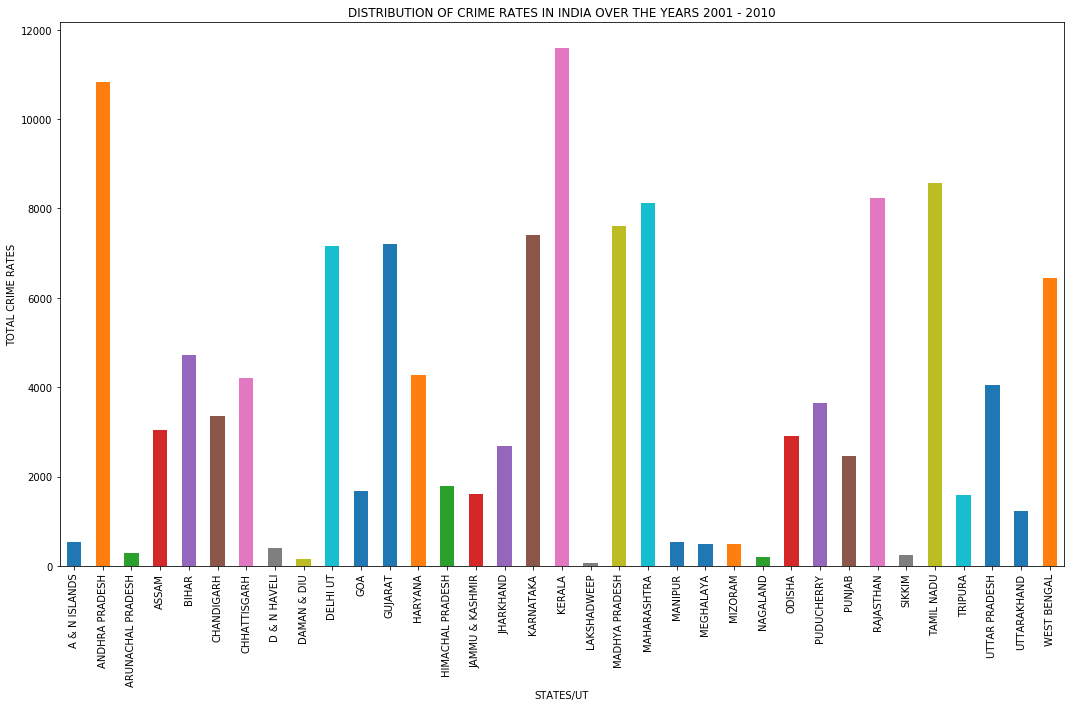

In [4]:
## plot graph for the above data extracted using matplotlib library

import matplotlib.pyplot as plt

plt.subplots(figsize = (18, 10))
ct =  total1
ax = ct.plot.bar()

ax.set_xlabel('STATES/UT')
ax.set_ylabel('TOTAL CRIME RATES')
ax.set_title('DISTRIBUTION OF CRIME RATES IN INDIA OVER THE YEARS 2001 - 2010')

plt.show()

In [5]:
## Displaying the top 3 states with high averages of crimes over the year 2001 to 2010
total1 = total1.sort_values(ascending = False)
top3 = total1[:3]
least3 = total1[-3:]
print(top3)
print(least3)

STATE/UT
KERALA            11584.638743
ANDHRA PRADESH    10838.933775
TAMIL NADU         8569.784062
Name: TOTAL IPC CRIMES, dtype: float64
STATE/UT
NAGALAND       192.280702
DAMAN & DIU    165.666667
LAKSHADWEEP     63.900000
Name: TOTAL IPC CRIMES, dtype: float64


## Inference1:
    From the above analysis we are able to conclude that:
    Top3 states with high crime rates are:
        1. Kerala had the highest average crime rate with rate 11584.638743
        2. Next stands Andhra pradesh with rate 10838.933775
        3. Tamil Nadu stands third with rate 8569.784062
    
    3 states with least crime rates are:
        1. Lakshadweep ---- 63.9000000
        2. Daman and Diu ------ 165.666667
        3. Nagaland ------- 192.280702
    
    Among the least 3 states, 2 of them are Union Territory and the other is a Eastern State

## We are going to take a close look at Tamil Nadu in the upcoming analysis

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
df = df.T.to_dict().values()

dic = []

for row in df:
    if(row['STATE/UT'] == 'TAMIL NADU' and row['DISTRICT'] != 'TOTAL' ):
        dic.append(row)

df_dist = pd.DataFrame(dic)  

g1 = df_dist.groupby('DISTRICT').mean()['TOTAL IPC CRIMES']



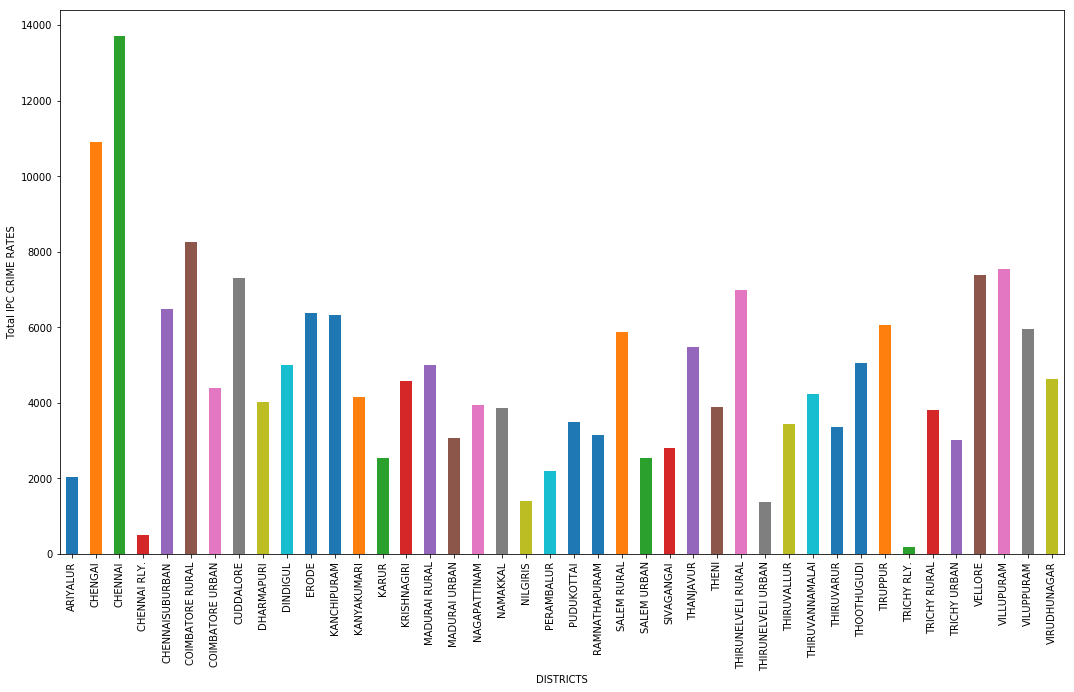

In [9]:
import matplotlib.pyplot as plt

plt.subplots(figsize = (18, 10))
ct =  g1
ax = ct.plot.bar()

ax.set_xlabel('DISTRICTS')
ax.set_ylabel('Total IPC CRIME RATES')


plt.show()

### INFERENCE 2:

CHENNAI has the highest crime rate among all the districts in TamilNadu and Trichy with the lowest

## Comparision between rural and urban places in TamilNadu

In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
df = df.T.to_dict().values()

dic = []
dic_ur = []
dic_rur = []

for row in df:
    if(row['STATE/UT'] == 'TAMIL NADU' and row['DISTRICT'] != 'TOTAL' ):
        dic.append(row)

for column in dic :
    if(column['DISTRICT'] == 'CHENNAI' or column['DISTRICT'] == 'COIMBATORE URBAN' or column['DISTRICT'] == 'TRICHY URBAN' or column['DISTRICT'] == 'MADURAI URBAN' or column['DISTRICT'] == 'THIRUNELVELI URBAN' or column['DISTRICT'] == 'SALEM URBAN' ):
        dic_ur.append(column)
        
for column in dic :
    if(column['DISTRICT'] == 'CHENNAI RLY.' or column['DISTRICT'] == 'COIMBATORE RURAL' or column['DISTRICT'] == 'TRICHY RURAL' or column['DISTRICT'] == 'MADURAI RURAL' or column['DISTRICT'] == 'THIRUNELVELI RURAL' or column['DISTRICT'] == 'SALEM RURAL' ):
        dic_rur.append(column)  
        
df_ur = pd.DataFrame(dic_ur)  
df_rur= pd.DataFrame(dic_rur) 

g1 = df_ur.groupby('YEAR').mean()['TOTAL IPC CRIMES']
g2 = df_rur.groupby('YEAR').mean()['TOTAL IPC CRIMES']



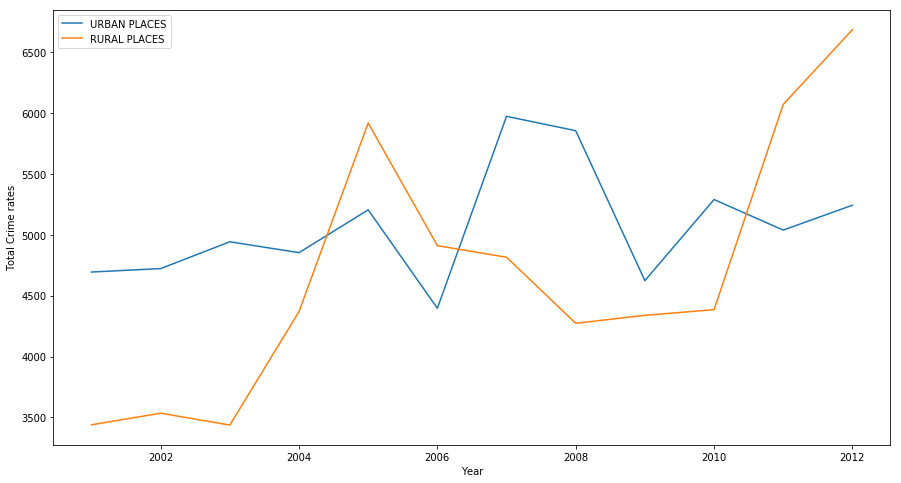

In [17]:
import matplotlib.pyplot as plt

plt.subplots(figsize = (15, 8))


ax = g2.plot()
ax = g1.plot()

ax.set(xlabel = 'Year' , ylabel = 'Total Crime rates')
plt.legend(['URBAN PLACES','RURAL PLACES'])
plt.show()


### INFERNCE 3: 

1. Urban places dont show much deviation over the years (2000 to 2012)
2. But crime rate in rural places has been fluctutating. 
3. In the year 2006, urban reached its minimum and then once again peaked until 2009
4. Rural places showed much lower crime rate than the urban places for 5 years(2006 to 2011) but reached its maximum in the year 2012

## JUVENILES CRIMES

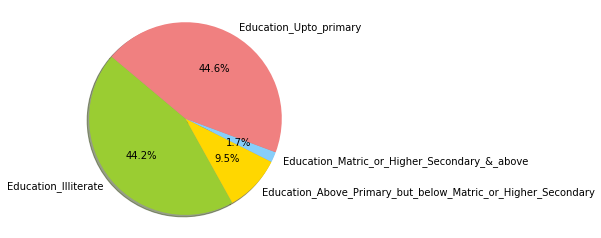

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

state = pd.read_csv('18_01_Juveniles_arrested_Education.csv')

state1 = state[state['Area_Name']=='Tamil Nadu']

del state1['Sub_Group_Name']

g1 = mean(state1['Education_Illiterate'])
g2 = mean(state1['Education_Above_Primary_but_below_Matric_or_Higher_Secondary'])
g3 = mean(state1['Education_Matric_or_Higher_Secondary_&_above'])
g4 = mean(state1['Education_Total'])
g5 = mean(state1['Education_Upto_primary'])

list_c = ['Education_Illiterate','Education_Above_Primary_but_below_Matric_or_Higher_Secondary','Education_Matric_or_Higher_Secondary_&_above','Education_Upto_primary']

g = [g1,g2,g3,g5]

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','deeppink']

plt.pie(g, labels = list_c, colors = colors, autopct = '%1.1f%%',shadow = True, startangle = 140)
plt.axis('equal')
plt.show()

### INFERENCE 4:

1. More than 95% of Juveniles who committed crime were illiterate or had a primary education
2. Nearly 2% of the Juveniles who completed higher education are involved in Criminal Activites

## Gender based analysis for Juveniles

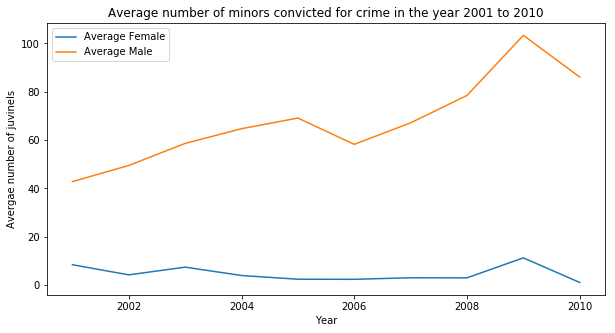

In [19]:
##converting csv files to data frames
import pandas as pd
state = pd.read_csv('08_01_Juvenile_apprehended_state_IPC.csv')
##seperating the required data from the source dataset
state1 = state[state['STATE/UT']=='Tamil Nadu']
state1 = state1[state1['CRIME']!='Total IPC crimes']
grouped1 = state1.groupby('Year').mean()['Total for boys all Age Groups']
grouped2 = state1.groupby('Year').mean()['Total for girls all Age Groups']
import matplotlib.pyplot as plt
import numpy as np

ct = grouped2
plt.subplots(figsize = (10, 5))
ax = grouped2.plot()
ax1 = grouped1.plot()
ax.set(xlabel = 'Year', ylabel = 'Avergae number of juvinels', 
       title = 'Average number of minors convicted for crime in the year 2001 to 2010')
plt.legend(['Average Female','Average Male'])
plt.show()


### INFERENCE 4:

The average number of male juveniles was always higher than female juveniles. The average number of male juveniles always resided above 40.

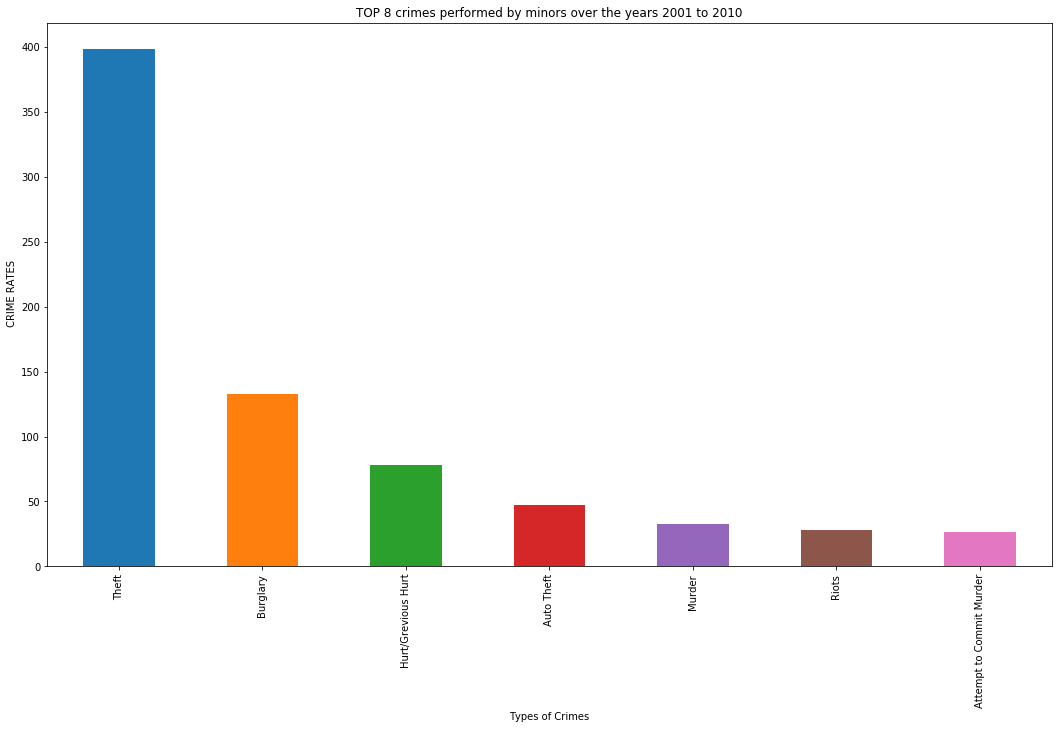

In [21]:
grouped3 = state1.groupby('CRIME').mean()['Grand total']
grouped3 = grouped3.sort_values(ascending=False)
grouped3=grouped3.drop(grouped3.index[[0,2,4]])
grouped3 = grouped3[:7]

import matplotlib.pyplot as plt

plt.subplots(figsize = (18, 10))
ct =  grouped3
ax = ct.plot.bar()

ax.set_xlabel('Types of Crimes')
ax.set_ylabel(' CRIME RATES')
ax.set_title('TOP 8 crimes performed by minors over the years 2001 to 2010')


plt.show()



## FUTURE ENHANCEMENTS:

The above analysis was just a basic and simple exploratory analysis on crime data of India. But in future we tend to develop a machine learning algorithm which can predict the trends of crime over the upcoming years with high accuracy.